In [1]:
# import modules
import pandas as pd
from functions import LDA
from ast import literal_eval

# import data
df = pd.read_csv('data/nvidia_articles.csv', converters={'content': literal_eval,
                                                         'stemmed_content': literal_eval,
                                                         'lemmatized_content': literal_eval})

### Iteration 1

In [ ]:
# train model
lda = LDA(docs=df['content'], n_topics=10, use_tfidf=False)
lda.train_model()

# get metrics
coherence = lda.coherence_score() # get coherence score
topic_variability = lda.topic_variability() # get topic variability

print(f'Coherence Score: {coherence:.3f}')
print(f'Topic Variability: {topic_variability:.3f}')

Coherence Score: 0.361
Topic Variability: 0.150


In [3]:
lda.print_topics()

Topic: 0 - Words: 0.011*"company" + 0.010*"nasdaq" + 0.009*"nvidia" + 0.009*"year" + 0.008*"zacks" + 0.008*"earnings" + 0.008*"quarter" + 0.007*"growth" + 0.006*"market" + 0.006*"stocks"
Topic: 1 - Words: 0.014*"nasdaq" + 0.010*"year" + 0.008*"nyse" + 0.007*"stocks" + 0.007*"company" + 0.007*"zacks" + 0.006*"inc" + 0.006*"earnings" + 0.006*"stock" + 0.005*"market"
Topic: 2 - Words: 0.012*"nasdaq" + 0.010*"company" + 0.010*"zacks" + 0.008*"year" + 0.006*"stocks" + 0.005*"earnings" + 0.005*"market" + 0.005*"nvidia" + 0.005*"also" + 0.004*"growth"
Topic: 3 - Words: 0.011*"year" + 0.011*"nasdaq" + 0.007*"zacks" + 0.006*"stock" + 0.006*"nvidia" + 0.006*"company" + 0.005*"earnings" + 0.005*"quarter" + 0.005*"growth" + 0.005*"stocks"
Topic: 4 - Words: 0.013*"zacks" + 0.012*"year" + 0.009*"company" + 0.009*"earnings" + 0.008*"nasdaq" + 0.007*"market" + 0.007*"nvidia" + 0.007*"quarter" + 0.006*"billion" + 0.006*"stocks"
Topic: 5 - Words: 0.010*"year" + 0.009*"zacks" + 0.008*"earnings" + 0.008*"

### Iteration 2

In [45]:
# train model
lda = LDA(docs=df['stemmed_content'], n_min=8, p_max=None, n_topics=10, use_tfidf=True)
lda.train_model()

# get metrics
coherence = lda.coherence_score() # get coherence score
topic_variability = lda.topic_variability() # get topic variability

print(f'Coherence Score: {coherence:.3f}')
print(f'Topic Variability: {topic_variability:.3f}')

# get document vectors
df['doc_vectors'] = lda.model.get_document_topics(lda.docs_matrix)

Filtering 16914 words...


c:\Users\sjoer\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Coherence Score: 0.691
Topic Variability: 0.140


In [46]:
lda.print_topics() # print topics

Topic: 0 - Words: 0.005*"mini" + 0.005*"baird" + 0.005*"mb" + 0.004*"thermostat" + 0.004*"struggl" + 0.004*"audit" + 0.004*"thesi" + 0.004*"understood" + 0.003*"foxa" + 0.003*"encount"
Topic: 1 - Words: 0.005*"audit" + 0.005*"mb" + 0.005*"thermostat" + 0.005*"mini" + 0.005*"struggl" + 0.004*"baird" + 0.004*"thesi" + 0.004*"understood" + 0.004*"benign" + 0.004*"encount"
Topic: 2 - Words: 0.005*"mini" + 0.005*"audit" + 0.004*"baird" + 0.004*"struggl" + 0.004*"mb" + 0.004*"thermostat" + 0.004*"benign" + 0.003*"encount" + 0.003*"foxa" + 0.003*"geforc"
Topic: 3 - Words: 0.005*"mini" + 0.005*"mb" + 0.005*"baird" + 0.004*"thermostat" + 0.004*"struggl" + 0.003*"understood" + 0.003*"foxa" + 0.003*"encount" + 0.003*"mpc" + 0.003*"thesi"
Topic: 4 - Words: 0.005*"thermostat" + 0.005*"baird" + 0.004*"struggl" + 0.004*"mini" + 0.004*"mb" + 0.004*"thesi" + 0.004*"understood" + 0.003*"foxa" + 0.003*"encount" + 0.003*"bump"
Topic: 5 - Words: 0.004*"thermostat" + 0.004*"mini" + 0.004*"baird" + 0.004*"st

In [ ]:
results = []
for n_topics in [5, 10, 15, 20]:
    for threshold in [0.50, 0.65, 0.80]:
        lda = LDA(df['lemmatized_content'], threshold, n_topics)
        lda.train_model()
        coherence = lda.coherence_score() # get coherence score
        topic_variability = lda.topic_variability() # get topic variability
        results.append({'n_topics': n_topics,
                        'threshold': threshold,
                        'coherence': coherence,
                        'topic_variability': topic_variability})
        
df_results = pd.DataFrame(results)

In [13]:
df_results

,n_topics,threshold,coherence,topic_variability
0,5,0.50,0.285792,0.420000
1,5,0.65,0.371213,0.420000
2,5,0.80,0.374869,0.340000
3,10,0.50,0.297082,0.370000
4,10,0.65,0.351747,0.220000
5,10,0.80,0.372104,0.220000
6,15,0.50,0.308366,0.280000
7,15,0.65,0.355934,0.193333
8,15,0.80,0.375730,0.173333
9,20,0.50,0.299137,0.260000


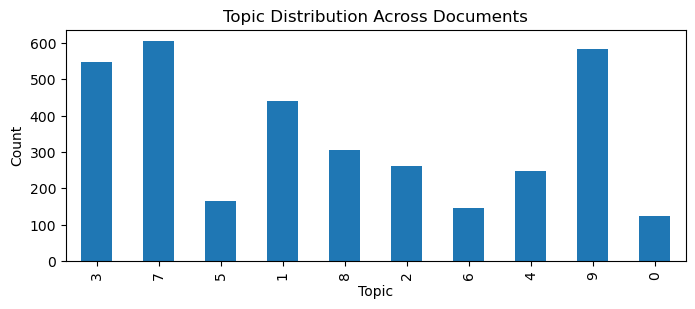

In [4]:
import matplotlib.pyplot as plt

# Get the topic distribution for each document
topic_distribution = [dict(doc) for doc in lda.model.get_document_topics(lda.bow)]

# Create a DataFrame to hold the topic distribution
topic_df = pd.DataFrame(topic_distribution).fillna(0)

# Sum the topic distribution across all documents to get the total count per topic
topic_counts = topic_df.sum(axis=0)

# Plot the topic counts
plt.figure(figsize=(8, 3))
topic_counts.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Topic Distribution Across Documents')
plt.show()

In [ ]:
# get representations
id2word = gensim.corpora.Dictionary(df[col]) # dictionary of words and their ids
bow = [id2word.doc2bow(doc) for doc in df[col]] # bag of words representation

# get coherence scores
coherence_scores = []
for i in range(2,22,2):
    n_topics = i
    lda_model = gensim.models.LdaMulticore(corpus=bow, id2word=id2word, num_topics=n_topics)
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=df[col], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

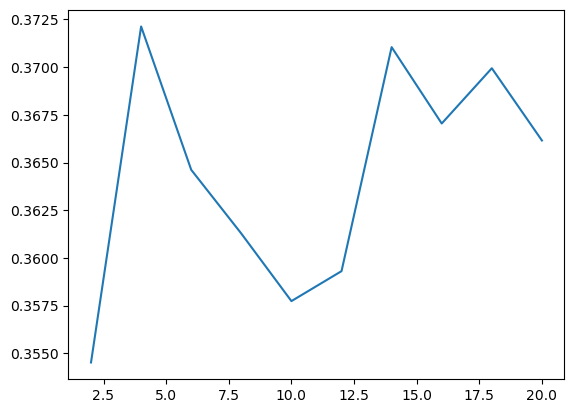

In [7]:
# plot coherence scores
import matplotlib.pyplot as plt
plt.plot(range(2,22,2), coherence_scores)


In [19]:
# pprint
from pprint import pprint
pprint(df['original_content'].iloc[7])

('Excitement is building up for the 2020 Summer Olympics in Tokyo as there is '
 'more for tourists and locals to look forward to than just watching the world '
 's best athletes excel in their game  Tokyo 2020 will not just be a sports '
 'event but is set to amaze the world by showcasing the future of travel i e  '
 'autonomous vehicles  The goal is to take advantage of the worldwide '
 'attention to display innovative automotive industry technologies by Japan to '
 'foster economic growth of the nation Driverless Cars on Tokyo Streets in '
 '2020Reportedly  the country will launch self driving vehicle services by '
 '2020  with around 100 autonomous vehicles roaming freely near the Olympics '
 'venues  carrying up to 7 000 passengers in the week starting Jul 6  '
 'Markedly  this will be Japan s biggest driverless vehicle trial to date  '
 'exhibiting the country s strength in the nascent technology  The country  '
 'which aims to put self driving cars on the market by 2025  will be

In [12]:
# requires installing pyldavis
# requires pandas version to 1.5.1

import pyLDAvis

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, bow, id2word)
pyLDAvis.save_html(LDAvis_prepared, './LDA_results/ldavis_prepared_'+ str(n_topics) +'i3.html')

AttributeError: module 'pyLDAvis' has no attribute 'gensim'